## Adding SNe to CoCo
___

This notebook will go through adding a SN to the CoCo template framework.

In [1]:
%matplotlib inline
# %matplotlib notebook

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
from matplotlib import pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

import os
import numpy as np
from astropy.table import Table, Column
from collections import OrderedDict

import pycoco as pcc

## Download SN
---
The example that I will go through is probably the simplest one - from a JSON that I have downloaded from http://sne.space contaning the information for SN2010as.

In [2]:
import json

In [3]:
snname = "SN2010as"
path = "/Users/berto/data/CoreCollapse/SNe/SN2010as.json"

sndict = json.load(open(path, 'r'))[snname]

In [4]:
len(sndict["spectra"])

26

In [5]:
S1 = sndict["spectra"][0]

In [6]:
S1.keys()

dict_keys(['time', 'filename', 'instrument', 'observer', 'redshift', 'reducer', 'reduction', 'u_fluxes', 'u_time', 'u_wavelengths', 'data', 'source'])

In [7]:
w = np.array(S1["data"], dtype=np.float64).T[0]
f = np.array(S1["data"], dtype=np.float64).T[1]

In [8]:
f

array([  1.99488800e-16,   2.74730800e-16,   2.80291500e-16, ...,
         5.54147300e-16,   5.59090900e-16,   5.63390900e-16])

In [9]:
from astropy.table import Table, Column, Row
import astropy.units as u


In [10]:
wavelength = Column(w, name = ("wavelength"), unit=u.Angstrom)
flux = Column(f, name = ("flux"), unit=u.cgs.erg / u.si.cm ** 2 / u.si.s / u.angstrom)

In [11]:
Table([wavelength, flux])

wavelength,flux
Angstrom,erg / (Angstrom cm2 s)
float64,float64
3674.0,1.994888e-16
3675.92575,2.747308e-16
3677.851501,2.802915e-16
3679.777251,2.936676e-16
3681.703001,3.203338e-16
3683.628751,2.445988e-16
3685.554502,3.125971e-16
3687.480252,2.8318e-16


In [12]:
spec_dict_list = sndict["spectra"]
for s in spec_dict_list:
    print(s["time"], s["filename"])

55275.0 SN10as_100320_DUP_WF_b01.dat
55276.0 SN10as_100321_GEM_GM_r01.dat
55277.0 SN10as_100322_DUP_WF_b01.dat
55278.0 SN10as_100323_DUP_WF_b01.dat
55279.0 SN10as_100324_DUP_WF_b01.dat
55280.0 SN10as_100325_DUP_WF_b01.dat
55280.0 SN10as_100325_VLT_XS_nir.dat
55280.0 SN10as_100325_VLT_XS_uvb.dat
55280.0 SN10as_100325_VLT_XS_vis.dat
55281.0 SN10as_100326_VLT_XS_nir.dat
55281.0 SN10as_100326_VLT_XS_uvb.dat
55281.0 SN10as_100326_VLT_XS_vis.dat
55283.0 SN10as_100328_VLT_XS_nir.dat
55283.0 SN10as_100328_VLT_XS_uvb.dat
55283.0 SN10as_100328_VLT_XS_vis.dat
55284.0 SN10as_100329_VLT_XS_nir.dat
55284.0 SN10as_100329_VLT_XS_uvb.dat
55284.0 SN10as_100329_VLT_XS_vis.dat
55295.0 SN10as_100409_SOA_GO_g01.dat
55308.0 SN10as_100422_GEM_GM_c01.dat
55385.0 SN10as_100708_GEM_GM_c01.dat
55400.0 SN10as_100723_SOA_GO_g01.dat
55410.0 SN10as_100802_GEM_GM_c01.dat
55413.0 SN10as_100805_SOA_GO_g01.dat
55597.0 SN10as_110205_BAA_IM_b01.dat
55597.0 SN10as_110205_BAA_IM_r01.dat


In [13]:
print(len(spec_dict_list))

26


['SN10as_100325_VLT_XS_nir.dat', 'SN10as_100325_VLT_XS_uvb.dat', 'SN10as_100325_VLT_XS_vis.dat']
6 SN10as_100325_VLT_XS_nir.dat
7 SN10as_100325_VLT_XS_uvb.dat
8 SN10as_100325_VLT_XS_vis.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:60: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:61: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


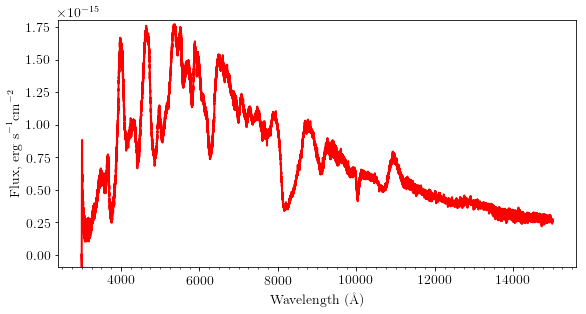

has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100325_VLT_XS_combined.dat
['SN10as_100326_VLT_XS_nir.dat', 'SN10as_100326_VLT_XS_uvb.dat', 'SN10as_100326_VLT_XS_vis.dat']
9 SN10as_100326_VLT_XS_nir.dat
10 SN10as_100326_VLT_XS_uvb.dat
11 SN10as_100326_VLT_XS_vis.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:60: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:61: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


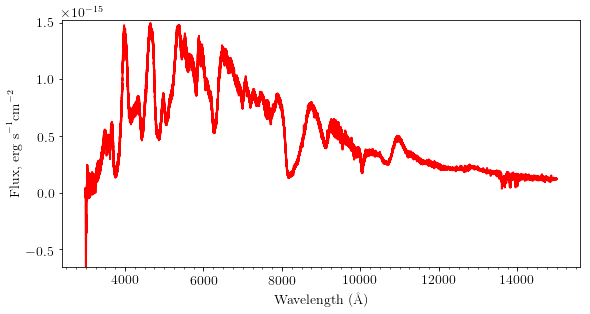

has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100326_VLT_XS_combined.dat
['SN10as_100328_VLT_XS_nir.dat', 'SN10as_100328_VLT_XS_uvb.dat', 'SN10as_100328_VLT_XS_vis.dat']


/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


12 SN10as_100328_VLT_XS_nir.dat
13 SN10as_100328_VLT_XS_uvb.dat
14 SN10as_100328_VLT_XS_vis.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:60: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:61: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


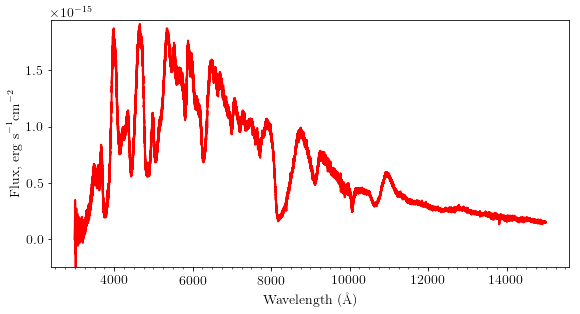

has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100328_VLT_XS_combined.dat
['SN10as_100329_VLT_XS_nir.dat', 'SN10as_100329_VLT_XS_uvb.dat', 'SN10as_100329_VLT_XS_vis.dat']


/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


15 SN10as_100329_VLT_XS_nir.dat
16 SN10as_100329_VLT_XS_uvb.dat
17 SN10as_100329_VLT_XS_vis.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:60: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:61: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


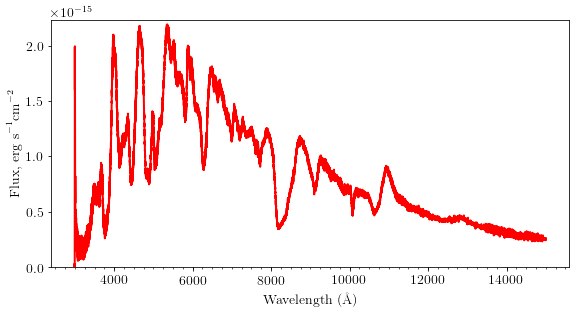

has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100329_VLT_XS_combined.dat


In [14]:
to_combine = ["SN10as_100325_VLT_XS_", 
              "SN10as_100326_VLT_XS_", 
              "SN10as_100328_VLT_XS_", 
              "SN10as_100329_VLT_XS_"]

to_combine_phases = [55280.0,
                     55281.0,
                     55283.0,
                     55284.0]

spec_filenames = [spec["filename"] for spec in sndict["spectra"]]
# spec_filenames = [spec["filename"][:-7] for spec in sndict["spectra"]]
mask = np.ones(len(spec_dict_list), dtype=bool)

combined = np.array([])

for prefix in to_combine:
    matches = [f for f in spec_filenames if prefix in f]
    print(matches)
    
    spec_dir = "/Users/berto/data/CoreCollapse/data/spectra/SN2010as/"
    
    tables = []
    out_dict = OrderedDict()
    for file in matches:
        w = np.where(np.array(spec_filenames) == file)[0]
        
        wavl = np.array(spec_dict_list[w]["data"], dtype=np.float64).T[0]
        flux = np.array(spec_dict_list[w]["data"], dtype=np.float64).T[1]
        
        wavelength = Column(wavl, name = ("wavelength"), unit=u.Angstrom)
        flux = Column(flux, name = ("flux"), unit=u.cgs.erg / u.si.cm ** 2 / u.si.s / u.angstrom)
     
        tables.append(Table([wavelength, flux]))
        
        for i in w:
            print(i, spec_dict_list[i]["filename"])
            mask[i] = False
#             spec_dict_list.pop(i)
            
    tables = np.array(tables)[np.argsort([i["wavelength"][0] for i in tables])]
    
    S1 = pcc.SpectrumClass()
    S2 = pcc.SpectrumClass()
    S3 = pcc.SpectrumClass()
    
    S1.load_table(tables[0], path="")
    S2.load_table(tables[1], path="")
    S3.load_table(tables[2], path="")
    
    sr=pcc.functions.combine_spectra(S2, S3, 9975, 10150, scale=True)
    spec = pcc.functions.combine_spectra(S1,sr, 5502.5, 5525)
    
    out_spec = pcc.SpectrumClass()
    out_spec.load_table(spec.data, path="", trim_wavelength=True, wmin=0, wmax=15000)
    
    filename = prefix+"combined.dat"
    
    out_dict["filename"] = os.path.join(spec_dir, filename)
    out_dict["time"] = np.float64(spec_dict_list[w]["time"])
    out_dict["redshift"] = spec_dict_list[w]["redshift"]
    out_dict["snname"] = snname
    
    combined = np.append(combined, out_dict)
    
#     spec.plot()
#     spec.save(filename, path=spec_dir, format="ascii.commented_header", verbose=True)
    out_spec.plot()
    out_spec.save(filename, path=spec_dir, format="ascii.commented_header", verbose=True)

In [15]:
out_dict

OrderedDict([('filename',
              '/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100329_VLT_XS_combined.dat'),
             ('time', 55284.0),
             ('redshift', '0.007315'),
             ('snname', 'SN2010as')])

SN10as_100320_DUP_WF_b01.dat
[0]
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100320_DUP_WF_b01.dat
has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100320_DUP_WF_b01.dat
55275.0


/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:25: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:27: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


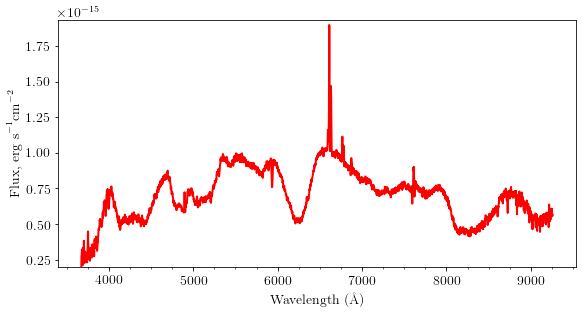

SN10as_100321_GEM_GM_r01.dat
[1]
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100321_GEM_GM_r01.dat
has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100321_GEM_GM_r01.dat
55276.0


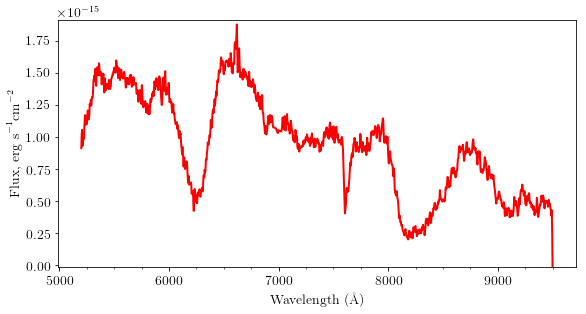

SN10as_100322_DUP_WF_b01.dat
[2]
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100322_DUP_WF_b01.dat
has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100322_DUP_WF_b01.dat
55277.0


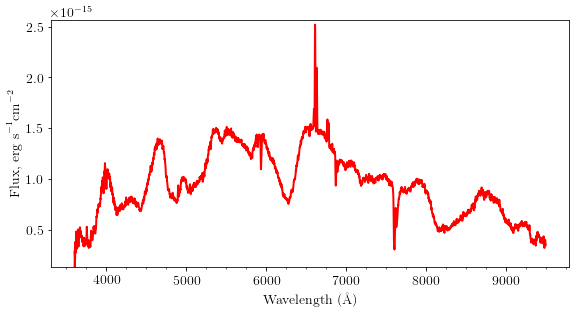

SN10as_100323_DUP_WF_b01.dat
[3]
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100323_DUP_WF_b01.dat
has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100323_DUP_WF_b01.dat
55278.0


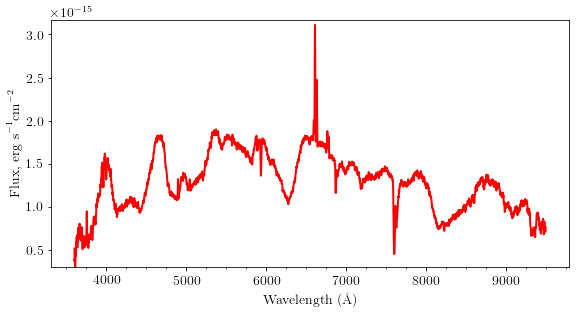

SN10as_100324_DUP_WF_b01.dat
[4]
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100324_DUP_WF_b01.dat
has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100324_DUP_WF_b01.dat
55279.0


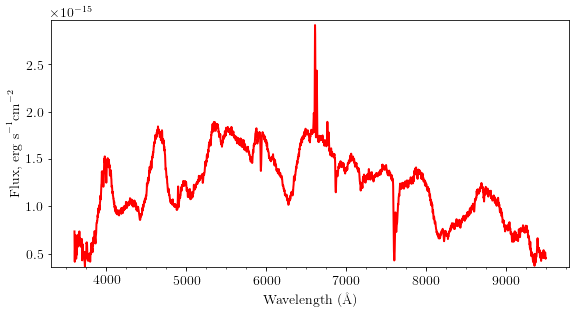

SN10as_100325_DUP_WF_b01.dat
[5]
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100325_DUP_WF_b01.dat
has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100325_DUP_WF_b01.dat
55280.0


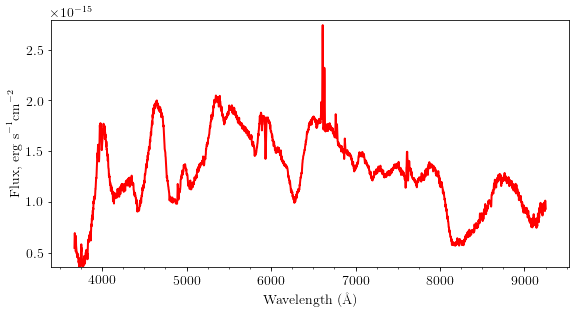

SN10as_100409_SOA_GO_g01.dat
[18]
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100409_SOA_GO_g01.dat
has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100409_SOA_GO_g01.dat
55295.0


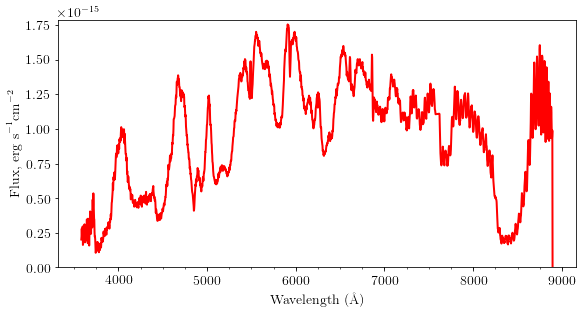

SN10as_100422_GEM_GM_c01.dat
[19]
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100422_GEM_GM_c01.dat
has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100422_GEM_GM_c01.dat
55308.0


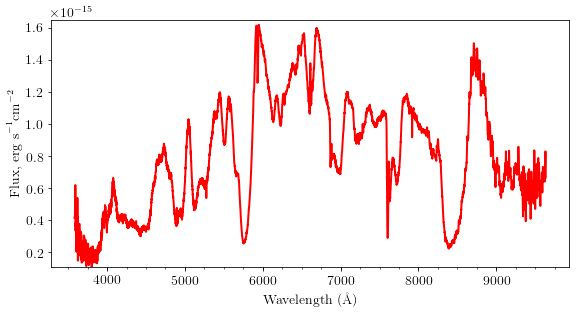

SN10as_100708_GEM_GM_c01.dat
[20]
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100708_GEM_GM_c01.dat
has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100708_GEM_GM_c01.dat
55385.0


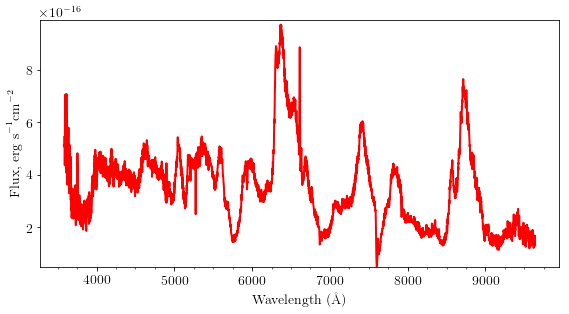

SN10as_100723_SOA_GO_g01.dat
[21]
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100723_SOA_GO_g01.dat
has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100723_SOA_GO_g01.dat
55400.0


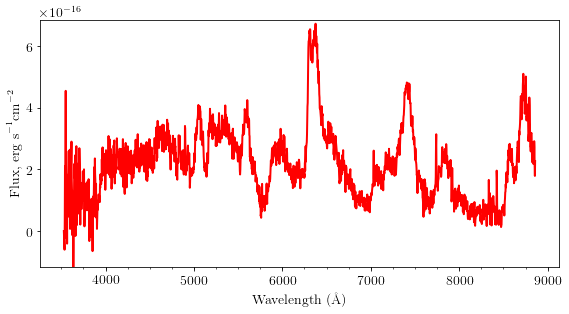

SN10as_100802_GEM_GM_c01.dat
[22]
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100802_GEM_GM_c01.dat
has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100802_GEM_GM_c01.dat
55410.0


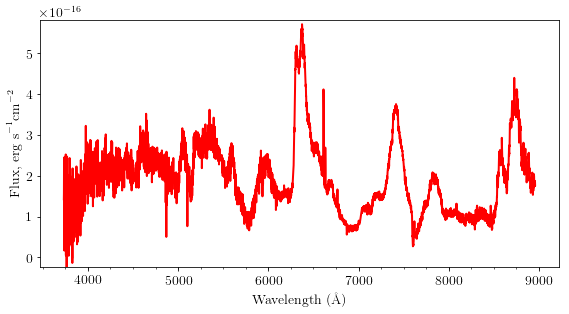

SN10as_100805_SOA_GO_g01.dat
[23]
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100805_SOA_GO_g01.dat
has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100805_SOA_GO_g01.dat
55413.0


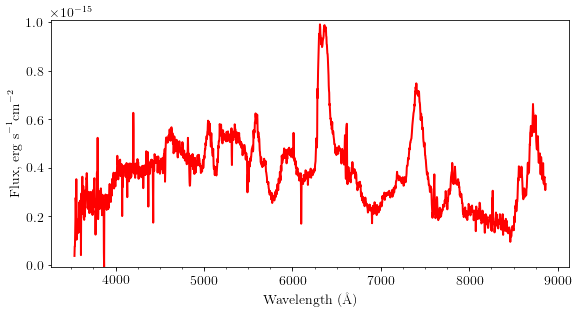

SN10as_110205_BAA_IM_b01.dat
[24]
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_110205_BAA_IM_b01.dat
has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_110205_BAA_IM_b01.dat
55597.0


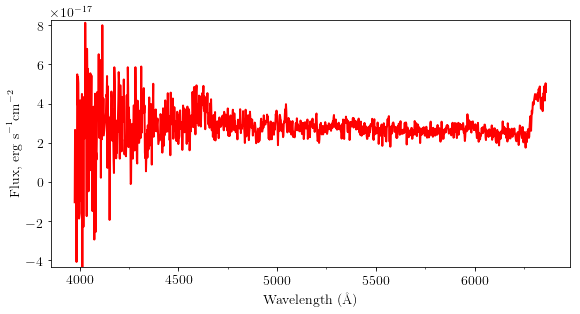

SN10as_110205_BAA_IM_r01.dat
[25]
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_110205_BAA_IM_r01.dat
has data
Writing /Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_110205_BAA_IM_r01.dat
55597.0


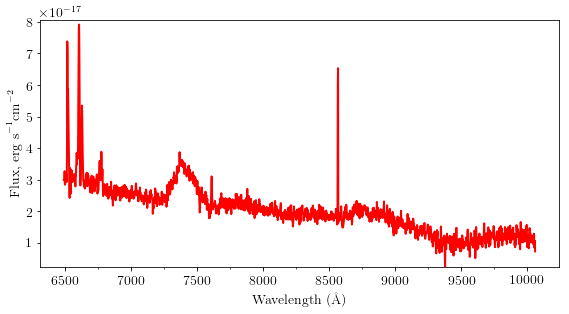

In [16]:
uncombined=np.array([])

for spec_file in np.array(spec_filenames)[mask]:
    print(spec_file)
    
    w = np.where(np.array(spec_filenames) == spec_file)[0]
    print(w)
    
    wavl = np.array(spec_dict_list[w]["data"], dtype=np.float64).T[0]
    flux = np.array(spec_dict_list[w]["data"], dtype=np.float64).T[1]

    wavelength = Column(wavl, name = ("wavelength"), unit=u.Angstrom)
    flux = Column(flux, name = ("flux"), unit=u.cgs.erg / u.si.cm ** 2 / u.si.s / u.angstrom)

    spec_table = Table([wavelength, flux])

    s = pcc.SpectrumClass()

    s.load_table(spec_table, path="")
    print(os.path.join(spec_dir, spec_file))
    s.save(spec_file, path=spec_dir, )
    out_dict = OrderedDict()
    out_dict["filename"] = os.path.join(spec_dir, spec_file)
    out_dict["time"] = np.float64(spec_dict_list[w]["time"])
    out_dict["redshift"] = spec_dict_list[w]["redshift"]
    out_dict["snname"] = snname
    print(spec_dict_list[w]["time"])
    uncombined = np.append(uncombined, out_dict)
    
    s.plot()

In [17]:
out_array = np.append(combined, uncombined)

In [18]:
out_array

array([ OrderedDict([('filename', '/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100325_VLT_XS_combined.dat'), ('time', 55280.0), ('redshift', '0.007315'), ('snname', 'SN2010as')]),
       OrderedDict([('filename', '/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100326_VLT_XS_combined.dat'), ('time', 55281.0), ('redshift', '0.007315'), ('snname', 'SN2010as')]),
       OrderedDict([('filename', '/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100328_VLT_XS_combined.dat'), ('time', 55283.0), ('redshift', '0.007315'), ('snname', 'SN2010as')]),
       OrderedDict([('filename', '/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100329_VLT_XS_combined.dat'), ('time', 55284.0), ('redshift', '0.007315'), ('snname', 'SN2010as')]),
       OrderedDict([('filename', '/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100320_DUP_WF_b01.dat'), ('time', 55275.0), ('redshift', '0.007315'), ('snname', 'SN2010as')]),
       OrderedDict([('filenam

In [19]:
# [i["filename"] for i in out_array]
# [i["redshift"] for i in out_array]
# [i["snname"] for i in out_array]
[i["time"] for i in out_array]

[55280.0,
 55281.0,
 55283.0,
 55284.0,
 55275.0,
 55276.0,
 55277.0,
 55278.0,
 55279.0,
 55280.0,
 55295.0,
 55308.0,
 55385.0,
 55400.0,
 55410.0,
 55413.0,
 55597.0,
 55597.0]

We need a (rough) estimate of the time of maximum light (only to ensure the spectra adhere to our naming convention), so from Folatelli et al. 2014 (http://iopscience.iop.org/article/10.1088/0004-637X/792/1/7/pdf) we have:

In [20]:
mjdmax = 55286.4

In [21]:
# keys = out_array[0].keys()

keys = ["filename",
        "snname",
        "time",
        "redshift"]
columns = []
for key in keys:
    columns.append([i[key] for i in out_array])

In [22]:
keys[2] = "MJD"
list_table = Table(columns, names = keys)

In [23]:
list_table.add_index("MJD")
list_table.sort()

In [24]:
list_table

filename,snname,MJD,redshift
str86,str8,float64,str8
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100320_DUP_WF_b01.dat,SN2010as,55275.0,0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100321_GEM_GM_r01.dat,SN2010as,55276.0,0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100322_DUP_WF_b01.dat,SN2010as,55277.0,0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100323_DUP_WF_b01.dat,SN2010as,55278.0,0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100324_DUP_WF_b01.dat,SN2010as,55279.0,0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100325_DUP_WF_b01.dat,SN2010as,55280.0,0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100325_VLT_XS_combined.dat,SN2010as,55280.0,0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100326_VLT_XS_combined.dat,SN2010as,55281.0,0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100328_VLT_XS_combined.dat,SN2010as,55283.0,0.007315


In [25]:
list_out_path = os.path.join(pcc._default_list_dir_path, snname+".list")
list_table.write(list_out_path, format="ascii.no_header")

In [26]:
info = pcc.InfoClass()
info.load()

In [27]:
info._data

snname,z_obs,mu,RA,Dec,Type,z_distmod,SkyCoords
,,,,,,,"deg,deg"
str9,float64,float64,str13,str13,str3,float64,object
SN1993J,-0.0001,27.82,09:55:24.7747,+69:01:13.702,IIb,0.000846738572565,"148.85322791666664,69.02047277777778"
SN1994I,0.0015,29.5,13:29:54.072,+47:11:30.50,Ic,0.00183405936245,"202.47529999999995,47.191805555555554"
SN1996cb,0.0024,30.69,11:03:41.98,+28:54:13.7,IIb,0.00316927429656,"165.92491666666666,28.903805555555554"
SN1998bw,0.0085,32.69,19:35:03.17,-52:50:46.1,Ic,0.00793139066351,"293.76320833333324,-52.846138888888895"
SN1999dn,0.0093,32.44,23:36:14.70,+02:09:08.8,Ib,0.00707356943452,"354.06125,2.1524444444444444"
SN2002ap,0.0022,29.76,01:36:23.85,+15:45:13.2,Ic,0.00206697015014,"24.099375,15.753666666666666"
SN2003jd,0.0188,34.33,23:21:03.38,-04:53:45.5,Ic,0.01676453466,"350.2640833333333,-4.8959722222222215"
SN2004aw,0.0159,34.48,11:57:50.24,+25:15:55.1,Ic,0.0179472672379,"179.45933333333332,25.265305555555557"


In [28]:
small_table = info._data[("snname", "z_obs", "mu", "RA", "Dec", "Type", "z_distmod")]

In [29]:
small_table

snname,z_obs,mu,RA,Dec,Type,z_distmod
str9,float64,float64,str13,str13,str3,float64
SN1993J,-0.0001,27.82,09:55:24.7747,+69:01:13.702,IIb,0.000846738572565
SN1994I,0.0015,29.5,13:29:54.072,+47:11:30.50,Ic,0.00183405936245
SN1996cb,0.0024,30.69,11:03:41.98,+28:54:13.7,IIb,0.00316927429656
SN1998bw,0.0085,32.69,19:35:03.17,-52:50:46.1,Ic,0.00793139066351
SN1999dn,0.0093,32.44,23:36:14.70,+02:09:08.8,Ib,0.00707356943452
SN2002ap,0.0022,29.76,01:36:23.85,+15:45:13.2,Ic,0.00206697015014
SN2003jd,0.0188,34.33,23:21:03.38,-04:53:45.5,Ic,0.01676453466
SN2004aw,0.0159,34.48,11:57:50.24,+25:15:55.1,Ic,0.0179472672379
SN2005bf,0.0189,34.73,10:23:56.99,-03:11:29.3,Ib,0.0201040285508


In [30]:
sndict.keys()

dict_keys(['schema', 'name', 'sources', 'alias', 'claimedtype', 'comovingdist', 'dec', 'discoverdate', 'discoverer', 'ebv', 'host', 'hostcomovingdist', 'hostdec', 'hostlumdist', 'hostoffsetang', 'hostoffsetdist', 'hostra', 'hostredshift', 'hostvelocity', 'lumdist', 'maxabsmag', 'maxappmag', 'maxdate', 'maxvisualabsmag', 'maxvisualappmag', 'maxvisualdate', 'ra', 'redshift', 'velocity', 'photometry', 'spectra'])

In [31]:
sndict["lumdist"]

[{'e_value': '11',
  'kind': 'host',
  'source': '3',
  'u_value': 'Mpc',
  'value': '30'}]

In [32]:
from astropy.cosmology import LambdaCDM
from astropy.coordinates import Distance

mu = 32.16 ## from NED -- https://ned.ipac.caltech.edu/ui/?q=objsearch&omegav=0.73&obj_sort=RA%20or%20Longitude&omegam=0.27&extend=no&hconst=73&out_csys=Equatorial&of=pre_text&img_stamp=YES&list_limit=5&out_equinox=J2000.0&corr_z=1&objname=NGC%206000

d = Distance(distmod=mu)

z_distmod = d.z

In [33]:
(snname, sndict["redshift"][0]["value"], mu, sndict["ra"][0]["value"], sndict["dec"][0]["value"], sndict["claimedtype"][0]["value"].replace("/", ""), z_distmod)

('SN2010as',
 '0.007315',
 32.16,
 '15:49:49.23',
 '-29:23:09.7',
 'Ibc',
 0.0062219449351045312)

In [34]:
small_table.add_row((snname, sndict["redshift"][0]["value"], mu, sndict["ra"][0]["value"], sndict["dec"][0]["value"], sndict["claimedtype"][0]["value"].replace("/", ""), z_distmod))

In [35]:
small_table

snname,z_obs,mu,RA,Dec,Type,z_distmod
str9,float64,float64,str13,str13,str3,float64
SN1993J,-0.0001,27.82,09:55:24.7747,+69:01:13.702,IIb,0.000846738572565
SN1994I,0.0015,29.5,13:29:54.072,+47:11:30.50,Ic,0.00183405936245
SN1996cb,0.0024,30.69,11:03:41.98,+28:54:13.7,IIb,0.00316927429656
SN1998bw,0.0085,32.69,19:35:03.17,-52:50:46.1,Ic,0.00793139066351
SN1999dn,0.0093,32.44,23:36:14.70,+02:09:08.8,Ib,0.00707356943452
SN2002ap,0.0022,29.76,01:36:23.85,+15:45:13.2,Ic,0.00206697015014
SN2003jd,0.0188,34.33,23:21:03.38,-04:53:45.5,Ic,0.01676453466
SN2004aw,0.0159,34.48,11:57:50.24,+25:15:55.1,Ic,0.0179472672379
SN2005bf,0.0189,34.73,10:23:56.99,-03:11:29.3,Ib,0.0201040285508


In [36]:
outfile = pcc._default_info_path.replace(".dat", "_new.dat")
small_table.write(outfile, format="ascii.commented_header")


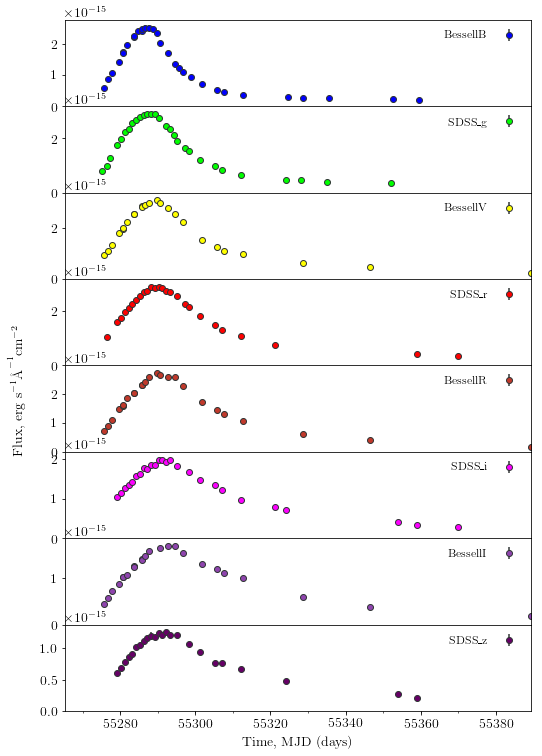

In [37]:
SN = pcc.SNClass(snname)
SN.load_phot()
SN.plot_lc()

In [38]:
list_file_path = "/Users/berto/Code/CoCo/lists/"+snname+".list"
# list_file_path = "/Users/berto/data/CoreCollapse/SNe/SN2010as.list"
SN.load_list(path=list_file_path)

In [39]:
SN.load_spec()

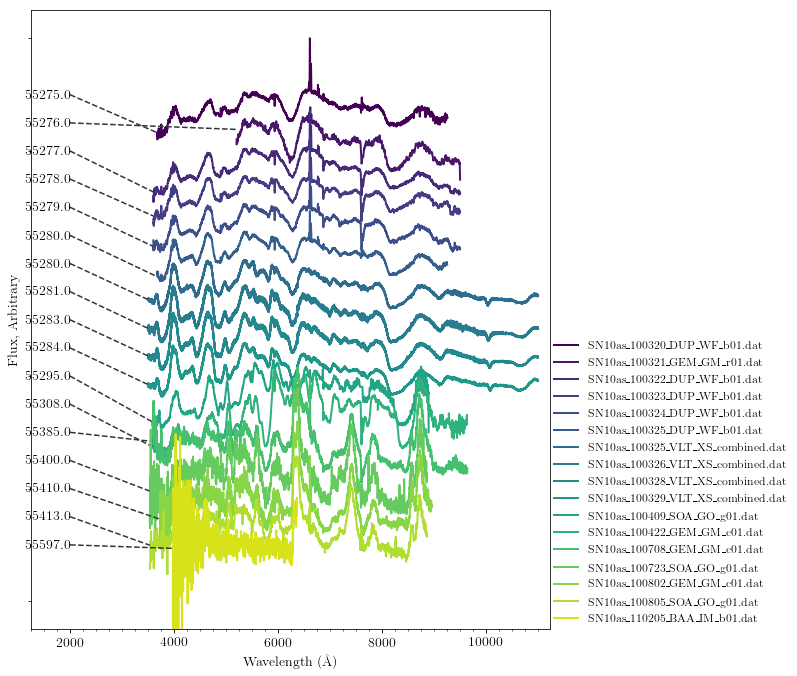

In [40]:
SN.plot_spec()

In [41]:
SN.spec

OrderedDict([('SN10as_100320_DUP_WF_b01.dat',
              <pycoco.classes.SpectrumClass at 0x1250cf400>),
             ('SN10as_100321_GEM_GM_r01.dat',
              <pycoco.classes.SpectrumClass at 0x123332898>),
             ('SN10as_100322_DUP_WF_b01.dat',
              <pycoco.classes.SpectrumClass at 0x124080eb8>),
             ('SN10as_100323_DUP_WF_b01.dat',
              <pycoco.classes.SpectrumClass at 0x124bf2a90>),
             ('SN10as_100324_DUP_WF_b01.dat',
              <pycoco.classes.SpectrumClass at 0x125067a58>),
             ('SN10as_100325_DUP_WF_b01.dat',
              <pycoco.classes.SpectrumClass at 0x125067160>),
             ('SN10as_100325_VLT_XS_combined.dat',
              <pycoco.classes.SpectrumClass at 0x125067940>),
             ('SN10as_100326_VLT_XS_combined.dat',
              <pycoco.classes.SpectrumClass at 0x125059400>),
             ('SN10as_100328_VLT_XS_combined.dat',
              <pycoco.classes.SpectrumClass at 0x12408f2e8>),
             

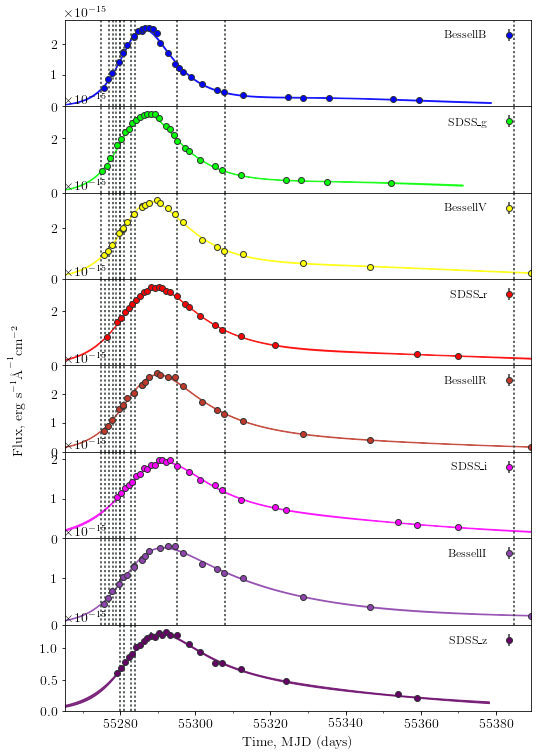

In [42]:
fit_path = "/Users/berto/Code/CoCo/recon/"+snname+".dat"
SN.get_lcfit(fit_path)

SN.plot_lc()

In [ ]:
# pcc.run_specfit(list_file_path)